In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


##Collapse Data Frames

In [0]:
ad = pd.read_csv('/content/drive/My Drive/AdmissionIndexed.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118883 entries, 0 to 118882
Data columns (total 79 columns):
Patient MEI Code                                      118883 non-null object
Patient Account Number                                118883 non-null int64
Patient Full Name                                     118883 non-null object
Patient SSN/National ID                               118883 non-null object
Pat Home Zip Code & Name                              118883 non-null object
Pat Home State Code & Name                            118883 non-null object
Patient Employer Name                                 118830 non-null object
Pat Home Country Name                                 118883 non-null object
Entity Name                                           118883 non-null object
PatientDateofBirth                                    118174 non-null object
Patient Age                                           118174 non-null float64
Patient Sex                               

In [0]:
ad.columns

Index(['Patient MEI Code', 'Patient Account Number', 'Patient Full Name',
       'Patient SSN/National ID', 'Pat Home Zip Code & Name',
       'Pat Home State Code & Name', 'Patient Employer Name',
       'Pat Home Country Name', 'Entity Name', 'PatientDateofBirth',
       'Patient Age', 'Patient Sex', 'Insured ID Number', 'PatientMedRecNo',
       'Readmission Pts', 'Patient Type Name', 'Patient Type', 'Newborn Flag',
       'Transportation', 'Check-in Source', 'Check-in Type',
       'Registr Point of OriginName', 'Facility of Origin',
       'Discharge Status Code', 'Discharge Status Name', 'Adm Date',
       'Discharge Date', 'Length of Stay', 'Encounters',
       'Days to Readmission (Index = start of new patient)',
       'Service Line 1 Description', 'Service Line 2 Description',
       'Service Line 3 Description', 'Med Svc Code', 'Med Svc Name',
       'Primary Payor Financial Class', 'Primary Payor Grouping',
       'Primary Payor Plan ID', 'Primary Payor Plan Name',
       '

New Columns in AdmissionIndexed: Length of Stay (Days in WithoutReadmission), Days to Readmission, Primary Payor Grouping.

In [0]:
od = pd.read_csv('/content/drive/My Drive/WithoutReadmission.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,57,61) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
od.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168980 entries, 0 to 168979
Data columns (total 77 columns):
Patient MEI Code                    168980 non-null object
Patient Account Number              168980 non-null int64
Patient Full Name                   168980 non-null object
Patient SSN/National ID             168980 non-null object
Pat Home Zip Code & Name            168980 non-null object
Pat Home State Code & Name          168980 non-null object
Patient Employer Name               168941 non-null object
Pat Home Country Name               168980 non-null object
Entity Name                         168980 non-null object
PatientDateofBirth                  168966 non-null object
Patient Age                         168966 non-null float64
Patient Sex                         168980 non-null object
Insured ID Number                   166948 non-null object
PatientMedRecNo                     168980 non-null int64
Readmission Pts                     0 non-null float64
Patient T

####Create New Dependent Variables
 Readmitted, <= 30 days Readmission, <= 7 days Readmission

In [0]:
Read_od = ['N']*168980
od['Read'] = Read_od
od.head()

,Patient MEI Code,Patient Account Number,Patient Full Name,Patient SSN/National ID,Pat Home Zip Code & Name,Pat Home State Code & Name,Patient Employer Name,Pat Home Country Name,Entity Name,PatientDateofBirth,Patient Age,Patient Sex,Insured ID Number,PatientMedRecNo,Readmission Pts,Patient Type Name,Patient Type,Newborn Flag,Transportation,Check-in Source,Check-in Type,Registr Point of OriginName,Facility of Origin,Discharge Status Code,Discharge Status Name,Adm Date,Discharge Date,Days,Encounters,Service Line 1 Description,Service Line 2 Description,Service Line 3 Description,Med Svc Code,Med Svc Name,Primary Payor Financial Class,Primary Payor Plan ID,Primary Payor Plan Name,Secondary Payor Plan Code,Secondary Payor Code,Prin Diagnosis Code,Prin Diagnosis Name,Sec Diagnosis Code,Sec Diagnosis Name,Third Diagnosis Code,Third Diagnosis Name,Prin Clin Proc Code,Princ Clin Proc Name,Secondary Procedure Code,Secondary Procedure Name,MDC Code,MDC Descr,APR-DRG Code,APR-DRG SOI,APR-DRG Wt,APR-DRG Name,MSDRG Code,MSDRG Name,MSDRG Wt,Total Account Balance,Charges,Primary Payor Detailed Exp'd Pmt,Posted Denials_Non Downgrade,Posted Denial_Downgrade Only,Total Payor Detailed Act Pmt,Primary Payor Detailed Act Pmt,Secondary Payor Payment Act Pmt,Patient Payment,Total Cost,Total Fixed Cost,Total Variable Cost,Fixed Dir Costs,Variable Dir Labor,Variable Dir Supply,Pract of Rec Full Name,Pract of Rec NPI,Admit Pract Name,Admit Pract NPI,Read
0,8451354781,760000002005,"HUTSON,BG-JOSEPHINE",ITEM NOT FOUND,19147 PHILADELPHIA,PA PENNSYLVANIA,ITEM NOT FOUND,UNITED STATES,Pennsylvania Hospital,7/9/16,0.0,Female,110995252,451354781,NaN,Inpatient,Newborn,Yes,NaN,Born Inside this Hospital,Newborn,NB-Newborn,NaN,6.0,Home health service,7/9/16,1/6/17,181,1,Pediatrics,Peds-Neonatology,Peds-Complicated Newborn,NEW,NEWBORN,Managed Medicaid,102501,UHC COMM PLAN FAMILY MEDICAID,NaN,NaN,Z38.01,"Single liveborn infant, delivered by cesarean",P07.22,"Extreme immaturity of NB, gestatnl age 23 comp...",P07.02,"Extremely low birth weight newborn, 500-749 grams",0BH17EZ,"Insertion of Endotracheal Airway into Trachea,...",02HV33Z,"Insertion of Infusion Dev into Sup Vena Cava, ...",15.0,NEWBORNS + OTHER NEONATES WITH CONDTN ORIG IN ...,956.0,0.0,(1.0000),UNGROUPABLE,790.0,EXTREME IMMATURITY OR RESPIRATORY DISTRESS SYN...,5.27,$0.00,"$1,674,053.00","$325,906.22",NaN,NaN,"$325,906.22","$325,906.22",NaN,NaN,"$468,852.41","$274,695.32","$194,157.09","$116,265.28","$158,608.79","$35,548.30","ABBASI, SORAYA",1.396781e+09,"MOLLEN, THOMAS J",1.831136e+09,N
1,8451435713,760000002021,"MAXIM,BB-KATHERINE",ITEM NOT FOUND,08540 PRINCETON,NJ NEW JERSEY,ITEM NOT FOUND,UNITED STATES,Pennsylvania Hospital,7/23/16,0.0,Male,W195265187,451435713,NaN,Inpatient,Newborn,Yes,NaN,Born Inside this Hospital,Newborn,NB-Newborn,NaN,6.0,Home health service,7/23/16,10/23/16,92,1,Pediatrics,Peds-Neonatology,Peds-Complicated Newborn,NEW,NEWBORN,Managed Care,100514,AETNA CHOICE POS,NaN,NaN,Z38.00,"Single liveborn infant, delivered vaginally",P07.03,"Extremely low birth weight newborn, 750-999 grams",Q25.0,Patent ductus arteriosus,5A0955Z,"Assistance with Respiratory Ventilation, >96 Hrs",NaN,NaN,15.0,NEWBORNS + OTHER NEONATES WITH CONDTN ORIG IN ...,956.0,0.0,(1.0000),UNGROUPABLE,790.0,EXTREME IMMATURITY OR RESPIRATORY DISTRESS SYN...,5.27,$0.00,"$623,107.00","$104,582.91",NaN,NaN,"$104,582.91","$104,582.91",NaN,NaN,"$216,767.14","$127,837.77","$88,929.37","$57,020.12","$76,684.66","$12,244.71","COOK, NOAH",1.376583e+09,"FITZPATRICK-DENNIS, ERIKA",1.598957e+09,N
2,8451461024,760000002039,"PHILLIPS,BGA AARIKA",ITEM NOT FOUND,19143 PHILADELPHIA,PA PENNSYLVANIA,ITEM NOT FOUND,UNITED STATES,Pennsylvania Hospital,7/27/16,0.0,Female,51853767,451461024,NaN,Inpatient,Newborn,Yes,NaN,Born Inside this Hospital,Newborn,NB-Newborn,NaN,5.0,Discharge/transferred to a Discharge Cancer Ce...,7/27/16,11/21/16,117,1,Pediatrics,Peds-Neonatology,Peds-Complicated Newborn,NEW,NEWBORN,Managed Medicaid,131505,KEYSTONE F

In [0]:
Read_ad = ['Y']*118883
ad['Read'] = Read_ad
ad.head()

,Patient MEI Code,Patient Account Number,Patient Full Name,Patient SSN/National ID,Pat Home Zip Code & Name,Pat Home State Code & Name,Patient Employer Name,Pat Home Country Name,Entity Name,PatientDateofBirth,Patient Age,Patient Sex,Insured ID Number,PatientMedRecNo,Readmission Pts,Patient Type Name,Patient Type,Newborn Flag,Transportation,Check-in Source,Check-in Type,Registr Point of OriginName,Facility of Origin,Discharge Status Code,Discharge Status Name,Adm Date,Discharge Date,Length of Stay,Encounters,Days to Readmission (Index = start of new patient),Service Line 1 Description,Service Line 2 Description,Service Line 3 Description,Med Svc Code,Med Svc Name,Primary Payor Financial Class,Primary Payor Grouping,Primary Payor Plan ID,Primary Payor Plan Name,Secondary Payor Plan Code,Secondary Payor Code,Prin Diagnosis Code,Prin Diagnosis Name,Sec Diagnosis Code,Sec Diagnosis Name,Third Diagnosis Code,Third Diagnosis Name,Prin Clin Proc Code,Princ Clin Proc Name,Secondary Procedure Code,Secondary Procedure Name,MDC Code,MDC Descr,APR-DRG Code,APR-DRG SOI,APR-DRG Wt,APR-DRG Name,MSDRG Code,MSDRG Name,MSDRG Wt,Total Account Balance,Charges,Primary Payor Detailed Exp'd Pmt,Posted Denials_Non Downgrade,Posted Denial_Downgrade Only,Total Payor Detailed Act Pmt,Primary Payor Detailed Act Pmt,Secondary Payor Payment Act Pmt,Patient Payment,Total Cost,Total Fixed Cost,Total Variable Cost,Fixed Dir Costs,Variable Dir Labor,Variable Dir Supply,Pract of Rec Full Name,Pract of Rec NPI,Admit Pract Name,Admit Pract NPI,Read
0,1000000005,10002985166,"BRAXTON,ROBERT E",203426475,19143 PHILADELPHIA,PA PENNSYLVANIA,DISABLED,UNITED STATES,Hospital of the University of Pennsylvania,6/16/53,63.0,Male,1184663,59,1,Inpatient,Inpatient,NaN,NaN,Non-Health care Facility Point of Origin,Emergency,EO-Emergency,NaN,1.0,"Home, self care",5/6/17,5/10/17,4,1,Index,General Medicine,General Medicine,Infectious Disease,CVM,CARDIOVASCULAR MEDICINE,Managed Medicaid,Managed Medicaid,125002,HEALTH PARTNERS MEDICAID,NaN,NaN,NaN,NaN,N17.9,"Acute kidney failure, unspecified",Z94.1,Heart transplant status,NaN,NaN,NaN,NaN,18.0,INFECTIOUS + PARASITIC DISEASES SYSTEMIC OR UN...,723.0,3.0,0.8400,VIRAL ILLNESS,866.0,VIRAL ILLNESS W/O MCC MS,0.7700,($172.86),"$66,220.00","$9,369.67",NaN,NaN,"$9,542.53","$9,542.53",NaN,NaN,"$14,677.94","$10,014.64","$4,663.30","$5,333.91","$3,052.31","$1,610.99","FORDE-MCLEAN, RHONDALYN",1.568512e+09,"MAZUREK, JEREMY ARYEH",1.336440e+09,Y
1,1000000005,10008189870,"BRAXTON,ROBERT E",203426475,19143 PHILADELPHIA,PA PENNSYLVANIA,DISABLED,UNITED STATES,Hospital of the University of Pennsylvania,6/16/53,64.0,Male,1184663,59,1,Inpatient,Inpatient,NaN,NaN,Clinic or Physician's Office,Emergency,RB-Routine Admission Unscheduled,NaN,6.0,Home health service,8/23/17,8/26/17,3,1,105,General Medicine,General Medicine,Infectious Disease,CVM,CARDIOVASCULAR MEDICINE,Managed Medicaid,Managed Medicaid,125002,HEALTH PARTNERS MEDICAID,NaN,NaN,B25.9,"Cytomegaloviral disease, unspecified",Z94.1,Heart transplant status,E11.22,Type 2 diabetes mellitus w diabetic chronic ki...,02HV33Z,"Insertion of Infusion Dev into Sup Vena Cava, ...",NaN,NaN,18.0,INFECTIOUS + PARASITIC DISEASES SYSTEMIC OR UN...,723.0,3.0,0.8400,VIRAL ILLNESS,866.0,VIRAL ILLNESS W/O MCC MS,0.7700,$0.00,"$48,211.00","$9,557.53",NaN,NaN,"$9,548.53","$9,548.53",NaN,NaN,"$11,699.29","$7,876.70","$3,822.59","$4,786.63","$2,643.51","$1,179.08","MATHER, PAUL J",1.093736e+09,"MATHER, PAUL J",1.093736e+09,Y
2,1000000005,10030893259,"BRAXTON,ROBERT E",203426475,19143 PHILADELPHIA,PA PENNSYLVANIA,DISABLED,UNITED STATES,Hospital of the University of Pennsylvania,6/16/53,65.0,Male,5292007,59,1,Inpatient,Inpatient,NaN,NaN,Non-Health care Facility Point of Origin,Emergency,EO-Emergency,NaN,6.0,Home health service,11/28/18,12/6/18,8,1,459,Cardiovascular,Cardiac Services,Medical Cardiology,CVM,CARDIOVASCULAR MEDICINE,Managed Medicare,Managed Medicare,177001,HEALTH PARTNERS MEDICARE,NaN,NaN,T86.21,Heart transplant 

In [0]:
ad['Read30Days'] = [""]*118883

Re30_ad = []
for ind in ad['Days to Readmission (Index = start of new patient)']:
  if(ind == "Index"):
    Re30_ad.append("N")
  elif(int(ind) > 30):
    Re30_ad.append("N")
  elif((int(ind) <= 30) & (int(ind) >= 0)):
    Re30_ad.append("Y")
  else:
    Re30_ad.append("NA")

In [0]:
len(Re30_ad)

118883

In [0]:
ad['Read30Days'] = Re30_ad
ad['Read30Days'].head()

0    N
1    N
2    N
3    Y
4    Y
Name: Read30Days, dtype: object

In [0]:
ad['Read7Days'] = [""]*118883

Re7_ad = []
for ind in ad['Days to Readmission (Index = start of new patient)']:
  if(ind == "Index"):
    Re7_ad.append("N")
  elif(int(ind) > 7):
    Re7_ad.append("N")
  elif((int(ind) <= 7) & (int(ind) >= 0)):
    Re7_ad.append("Y")
  else:
    Re7_ad.append("NA")

In [0]:
len(Re7_ad)

118883

In [0]:
ad['Read7Days'] = Re7_ad
ad['Read7Days'].head()

0    N
1    N
2    N
3    N
4    N
Name: Read7Days, dtype: object

In [0]:
od['Read7Days'] = ["N"]*168980
od['Read30Days'] = ["N"]*168980

Days to Readmission for WithoutReadmission

In [0]:
od['Days to Readmission (Index = start of new patient)'] = [" "]*168980

In [0]:
od = od.rename(columns = {"Days":"Length of Stay"}) 

In [0]:
od['Primary Payor Grouping'] = [" "]*168980

In [0]:
#df[ad['Primary Payor Grouping'].str.match(gp)]

In [0]:
#od['Primary Payor Grouping'] = [""]*168980

#Grouping_od = []
#for gp in od['Primary Payor Plan Name']:
  #print(list(ad[ad['Primary Payor Plan Name'].str.match(gp)]['Primary Payor Grouping'].drop_duplicates()))
#  Grouping_od.append(list(ad[ad['Primary Payor Plan Name'].str.match(gp)]['Primary Payor Grouping'].drop_duplicates()))


Number of Readmissions

In [0]:
ad['NumOfRead'] = [""]*118883

NumOfRead_ad = []
countRe = ad.groupby('Patient Full Name').agg({'Patient Full Name': ['count']}).reset_index()
countRe = pd.DataFrame(countRe.to_records()).drop(['index'],axis=1).rename(columns={"('Patient Full Name', '')": "Patient Full Name", "('Patient Full Name', 'count')": "NumOfRead"})
mg = pd.merge(ad,countRe, on = 'Patient Full Name')

In [0]:
ad['NumOfRead'] = mg['NumOfRead_y']-1

In [0]:
#ad['NumOfRead'].head(30)

In [0]:
od['NumOfRead'] = [0]*168980

In [0]:
frame = [ad, od]
merged = pd.concat(frame)
merged.info()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


<class 'pandas.core.frame.DataFrame'>
Int64Index: 287863 entries, 0 to 168979
Data columns (total 83 columns):
 APR-DRG Wt                                           286917 non-null object
 MSDRG Wt                                             285907 non-null object
APR-DRG Code                                          286917 non-null float64
APR-DRG Name                                          286917 non-null object
APR-DRG SOI                                           286917 non-null float64
Adm Date                                              287863 non-null object
Admit Pract NPI                                       285120 non-null float64
Admit Pract Name                                      285455 non-null object
Charges                                               287863 non-null object
Check-in Source                                       286067 non-null object
Check-in Type                                         286079 non-null object
Days to Readmission (Index = start of n

In [0]:
merged.to_csv('/content/drive/My Drive/Collapsed.csv')

##Data Type Conversion

In [0]:
collapsed = pd.read_csv('/content/drive/My Drive/Collapsed.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (28,37,45,46,49,67) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
collapsed.columns

Index(['Unnamed: 0', ' APR-DRG Wt ', ' MSDRG Wt ', 'APR-DRG Code',
       'APR-DRG Name', 'APR-DRG SOI', 'Adm Date', 'Admit Pract NPI',
       'Admit Pract Name', 'Charges', 'Check-in Source', 'Check-in Type',
       'Days to Readmission (Index = start of new patient)', 'Discharge Date',
       'Discharge Status Code', 'Discharge Status Name', 'Encounters',
       'Entity Name', 'Facility of Origin', 'Fixed Dir Costs',
       'Insured ID Number', 'Length of Stay', 'MDC Code', 'MDC Descr',
       'MSDRG Code', 'MSDRG Name', 'Med Svc Code', 'Med Svc Name',
       'Newborn Flag', 'NumOfRead', 'Pat Home Country Name',
       'Pat Home State Code & Name', 'Pat Home Zip Code & Name',
       'Patient Account Number', 'Patient Age', 'Patient Employer Name',
       'Patient Full Name', 'Patient MEI Code', 'Patient Payment',
       'Patient SSN/National ID', 'Patient Sex', 'Patient Type',
       'Patient Type Name', 'PatientDateofBirth', 'PatientMedRecNo',
       'Posted Denial_Downgrade Only', 

In [0]:
collapsed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287863 entries, 0 to 287862
Data columns (total 84 columns):
Unnamed: 0                                            287863 non-null int64
 APR-DRG Wt                                           286917 non-null object
 MSDRG Wt                                             285907 non-null object
APR-DRG Code                                          286917 non-null float64
APR-DRG Name                                          286917 non-null object
APR-DRG SOI                                           286917 non-null float64
Adm Date                                              287863 non-null object
Admit Pract NPI                                       285120 non-null float64
Admit Pract Name                                      285455 non-null object
Charges                                               287863 non-null object
Check-in Source                                       286067 non-null object
Check-in Type                           

In [0]:
# Check the percentage of Nan in dataset
total = collapsed.isnull().sum().sort_values(ascending=False)
#collapsed.isnull().sum().sort_values(ascending=False)
percent = (collapsed.isnull().sum()/collapsed['Entity Name'].count()).sort_values(ascending=False)
percent
#missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
#missing_data.to_csv('/content/drive/My Drive/Nas.csv')
#missing_data.head(20)

Posted Denials_Non Downgrade    0.988651
Posted Denial_Downgrade Only    0.980908
Transportation                  0.924023
Facility of Origin              0.924006
Newborn Flag                    0.864898
                                  ...   
Patient Full Name               0.000000
Patient Account Number          0.000000
Pat Home Zip Code & Name        0.000000
NumOfRead                       0.000000
Unnamed: 0                      0.000000
Length: 84, dtype: float64

In [0]:
collapsed.head(10)

,Unnamed: 0,APR-DRG Wt,MSDRG Wt,APR-DRG Code,APR-DRG Name,APR-DRG SOI,Adm Date,Admit Pract NPI,Admit Pract Name,Charges,Check-in Source,Check-in Type,Days to Readmission (Index = start of new patient),Discharge Date,Discharge Status Code,Discharge Status Name,Encounters,Entity Name,Facility of Origin,Fixed Dir Costs,Insured ID Number,Length of Stay,MDC Code,MDC Descr,MSDRG Code,MSDRG Name,Med Svc Code,Med Svc Name,Newborn Flag,NumOfRead,Pat Home Country Name,Pat Home State Code & Name,Pat Home Zip Code & Name,Patient Account Number,Patient Age,Patient Employer Name,Patient Full Name,Patient MEI Code,Patient Payment,Patient SSN/National ID,...,PatientMedRecNo,Posted Denial_Downgrade Only,Posted Denials_Non Downgrade,Pract of Rec Full Name,Pract of Rec NPI,Primary Payor Detailed Act Pmt,Primary Payor Detailed Exp'd Pmt,Primary Payor Financial Class,Primary Payor Grouping,Primary Payor Plan ID,Primary Payor Plan Name,Prin Clin Proc Code,Prin Diagnosis Code,Prin Diagnosis Name,Princ Clin Proc Name,Read,Read30Days,Read7Days,Readmission Pts,Registr Point of OriginName,Sec Diagnosis Code,Sec Diagnosis Name,Secondary Payor Code,Secondary Payor Payment Act Pmt,Secondary Payor Plan Code,Secondary Procedure Code,Secondary Procedure Name,Service Line 1 Description,Service Line 2 Description,Service Line 3 Description,Third Diagnosis Code,Third Diagnosis Name,Total Account Balance,Total Cost,Total Fixed Cost,Total Payor Detailed Act Pmt,Total Variable Cost,Transportation,Variable Dir Labor,Variable Dir Supply
0,0,0.8400,0.7700,723.0,VIRAL ILLNESS,3.0,5/6/17,1336440254.0,"MAZUREK, JEREMY ARYEH",66220.00,Non-Health care Facility Point of Origin,Emergency,0,5/10/17,1.0,"Home, self care",1,Hospital of the University of Pennsylvania,NaN,5333.91,1184663,4,18.0,INFECTIOUS + PARASITIC DISEASES SYSTEMIC OR UN...,866.0,VIRAL ILLNESS W/O MCC MS,CVM,CARDIOVASCULAR MEDICINE,NaN,4,UNITED STATES,PA PENNSYLVANIA,19143 PHILADELPHIA,10002985166,63.0,DISABLED,"BRAXTON,ROBERT E",1000000005,NaN,203426475,...,59,NaN,NaN,"FORDE-MCLEAN, RHONDALYN",1568512499.0,9542.53,9369.67,Managed Medicaid,Managed Medicaid,125002,HEALTH PARTNERS MEDICAID,NaN,NaN,NaN,NaN,Y,N,N,1.0,EO-Emergency,N17.9,"Acute kidney failure, unspecified",NaN,NaN,nan,NaN,NaN,General Medicine,General Medicine,Infectious Disease,Z94.1,Heart transplant status,-172.86,14677.94,10014.64,9542.53,4663.30,NaN,3052.31,1610.99
1,1,0.8400,0.7700,723.0,VIRAL ILLNESS,3.0,8/23/17,1093735847.0,"MATHER, PAUL J",48211.00,Clinic or Physician's Office,Emergency,105,8/26/17,6.0,Home health service,1,Hospital of the University of Pennsylvania,NaN,4786.63,1184663,3,18.0,INFECTIOUS + PARASITIC DISEASES SYSTEMIC OR UN...,866.0,VIRAL ILLNESS W/O MCC MS,CVM,CARDIOVASCULAR MEDICINE,NaN,4,UNITED STATES,PA PENNSYLVANIA,19143 PHILADELPHIA,10008189870,64.0,DISABLED,"BRAXTON,ROBERT E",1000000005,NaN,203426475,...,59,NaN,NaN,"MATHER, PAUL J",1093735847.0,9548.53,9557.53,Managed Medicaid,Managed Medicaid,125002,HEALTH PARTNERS MEDICAID,02HV33Z,B25.9,"Cytomegaloviral disease, unspecified","Insertion of Infusion Dev into Sup Vena Cava, ...",Y,N,N,1.0,RB-Routine Admission Unscheduled,Z94.1,Heart transplant status,NaN,NaN,nan,NaN,NaN,General Medicine,General Medicine,Infectious Disease,E11.22,Type 2 diabetes mellitus w diabetic chronic ki...,0.00,11699.29,7876.70,9548.53,3822.59,NaN,2643.51,1179.08
2,2,0.8500,0.7500,206.0,"MALFUNCTION,REACTION,COMPLICATION OF CARDIAC/V...",3.0,11/28/18,1316388853.0,"BIRATI, EDO YAAKOV",198539.00,Non-Health care Facility Point of Origin,Emergency,459,12/6/18,6.0,Home health service,1,Hospital of the University of Pennsylvania,NaN,8037.96,5292007,8,5.0,DISEASES + DISORDERS OF THE CIRCULATORY SYSTEM,316.0,OTHER CIRCULATORY SYSTEM DIAGNOSES W/O CC/MCC MS,CVM,CARDIOVASCULAR MEDICINE,NaN,4,UNITED STATES,PA PENNSYLVANIA,19143 PHILADELPHIA,10030893259,65.0,DISABLED,"BRAXTON,ROBERT E",1000000005,NaN,203426475,...,59,NaN,NaN,"MATHER, PAUL J",1093735847.0,6692.30,6686.14,Managed Medicare,Managed Medicare,177001,H

Convert String with $ to Numeric 

In [0]:
cols = ['Total Account Balance','Total Cost','Total Fixed Cost','Total Payor Detailed Act Pmt','Total Variable Cost',
        'Variable Dir Labor','Variable Dir Supply','Primary Payor Detailed Act Pmt',"Primary Payor Detailed Exp'd Pmt",
        'Fixed Dir Costs','Charges']
for col in cols:
	collapsed[col] = collapsed[col].replace( '[\$,)]','', regex=True ).replace( '[(]','-',   regex=True ).astype(float)

Convert "Index" in Days to Readmission to 0 days.

In [0]:
collapsed["Days to Readmission (Index = start of new patient)"] = collapsed["Days to Readmission (Index = start of new patient)"].replace( 'Index','0', regex=True )

In [0]:
cols2 = ['APR-DRG Code','APR-DRG SOI','Admit Pract NPI','Discharge Status Code','MDC Code','MSDRG Code','Patient Account Number',
         'PatientMedRecNo','Pract of Rec NPI','Secondary Payor Plan Code']
for col in cols2:
	collapsed[col] = collapsed[col].astype(str)

In [0]:
collapsed['Days to Readmission (Index = start of new patient)'].unique()

array(['0', '105', '459', ..., '-10', '-22', ' '], dtype=object)

In [0]:
collapsed.dtypes[collapsed.dtypes!=object]

Unnamed: 0                            int64
Charges                             float64
Encounters                            int64
Fixed Dir Costs                     float64
Length of Stay                        int64
NumOfRead                             int64
Patient Age                         float64
Primary Payor Detailed Act Pmt      float64
Primary Payor Detailed Exp'd Pmt    float64
Readmission Pts                     float64
Total Account Balance               float64
Total Cost                          float64
Total Fixed Cost                    float64
Total Payor Detailed Act Pmt        float64
Total Variable Cost                 float64
Variable Dir Labor                  float64
Variable Dir Supply                 float64
dtype: object

In [0]:
collapsed1 = collapsed[['Charges','Fixed Dir Costs','Length of Stay','NumOfRead',,'Patient Age','Primary Payor Detailed Act Pmt',"Primary Payor Detailed Exp'd Pmt",
                        'Readmission Pts','Total Account Balance','Total Cost','Total Fixed Cost','Total Payor Detailed Act Pmt',
                        'Total Variable Cost','Variable Dir Labor','Variable Dir Supply']]

In [0]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 20)
#collapsed1 = collapsed.drop('Encounters', axis=1)
#collapsed.drop('Unnamed: 0', axis=1)
sns.heatmap(collapsed1.corr(),cmap='RdBu',ax=ax,annot=True,linewidths=2)
plt.savefig('corr_med.png',dpi = 200)

##Data Exploration

###Patient Sex

**Patient Sex vs. Readmitted or not**



In [0]:
collapsed[collapsed['Read30Days']=="Y"]

,Unnamed: 0,APR-DRG Wt,MSDRG Wt,APR-DRG Code,APR-DRG Name,APR-DRG SOI,Adm Date,Admit Pract NPI,Admit Pract Name,Charges,Check-in Source,Check-in Type,Days to Readmission (Index = start of new patient),Discharge Date,Discharge Status Code,Discharge Status Name,Encounters,Entity Name,Facility of Origin,Fixed Dir Costs,Insured ID Number,Length of Stay,MDC Code,MDC Descr,MSDRG Code,MSDRG Name,Med Svc Code,Med Svc Name,Newborn Flag,NumOfRead,Pat Home Country Name,Pat Home State Code & Name,Pat Home Zip Code & Name,Patient Account Number,Patient Age,Patient Employer Name,Patient Full Name,Patient MEI Code,Patient Payment,Patient SSN/National ID,...,PatientMedRecNo,Posted Denial_Downgrade Only,Posted Denials_Non Downgrade,Pract of Rec Full Name,Pract of Rec NPI,Primary Payor Detailed Act Pmt,Primary Payor Detailed Exp'd Pmt,Primary Payor Financial Class,Primary Payor Grouping,Primary Payor Plan ID,Primary Payor Plan Name,Prin Clin Proc Code,Prin Diagnosis Code,Prin Diagnosis Name,Princ Clin Proc Name,Read,Read30Days,Read7Days,Readmission Pts,Registr Point of OriginName,Sec Diagnosis Code,Sec Diagnosis Name,Secondary Payor Code,Secondary Payor Payment Act Pmt,Secondary Payor Plan Code,Secondary Procedure Code,Secondary Procedure Name,Service Line 1 Description,Service Line 2 Description,Service Line 3 Description,Third Diagnosis Code,Third Diagnosis Name,Total Account Balance,Total Cost,Total Fixed Cost,Total Payor Detailed Act Pmt,Total Variable Cost,Transportation,Variable Dir Labor,Variable Dir Supply
3,3,0.8500,0.9600,206.0,"MALFUNCTION,REACTION,COMPLICATION OF CARDIAC/V...",3.0,1/5/19,1.154528e+09,"PIERETTI, JANICE","$205,928.54",Non-Health care Facility Point of Origin,Emergency,30,1/15/19,6.0,Home health service,1,Hospital of the University of Pennsylvania,NaN,"$7,901.57",5292007,10,5.0,DISEASES + DISORDERS OF THE CIRCULATORY SYSTEM,315.0,OTHER CIRCULATORY SYSTEM DIAGNOSES W CC MS,CVM,CARDIOVASCULAR MEDICINE,NaN,4,UNITED STATES,PA PENNSYLVANIA,19143 PHILADELPHIA,10032642878,65.0,DISABLED,"BRAXTON,ROBERT E",1000000005,NaN,203426475,...,59,NaN,NaN,"GOLDBERG, LEE R",1.144250e+09,"$8,634.55","$8,233.42",Managed Medicare,Managed Medicare,177001,HEALTH PARTNERS MEDICARE,02H633Z,T86.21,Heart transplant rejection,"Insertion of Infusion Device into R Atrium, Pe...",Y,Y,N,1.0,EO-Emergency,K52.1,Toxic gastroenteritis and colitis,NaN,NaN,NaN,NaN,NaN,Cardiovascular,Cardiac Services,Medical Cardiology,R53.81,Other malaise,$0.00,"$44,822.62","$21,826.12","$8,634.55","$22,996.49",NaN,"$10,569.83","$12,426.66"
4,4,1.2300,1.1400,192.0,CARDIAC CATHETERIZATION FOR OTHER NON-CORONARY...,3.0,1/29/19,1.275522e+09,"WALD, JOYCE W","$89,552.17",Non-Health care Facility Point of Origin,Emergency,14,2/2/19,6.0,Home health service,1,Hospital of the University of Pennsylvania,NaN,"$4,934.37",5292007,4,5.0,DISEASES + DISORDERS OF THE CIRCULATORY SYSTEM,287.0,"CIRCULATORY DISORDERS EXCEPT AMI, W CARD CATH ...",CVM,CARDIOVASCULAR MEDICINE,NaN,4,UNITED STATES,PA PENNSYLVANIA,19143 PHILADELPHIA,10033916487,65.0,DISABLED,"BRAXTON,ROBERT E",1000000005,NaN,203426475,...,59,NaN,"$9,617.31","MATHER, PAUL J",1.093736e+09,"$2,622.53","$9,617.31",Managed Medicare,Managed Medicare,177001,HEALTH PARTNERS MEDICARE,4A023N6,NaN,NaN,"Measure of Cardiac Sampl & Pressure, R Heart, ...",Y,Y,N,1.0,EO-Emergency,T86.298,Other complications of heart transplant,NaN,NaN,NaN,B2141ZZ,Fluoroscopy of Right Heart using Low Osmolar C...,Cardiovascular,Cardiac Services,Diagnostic Cath,T86.21,Heart transplant rejection,$0.00,"$14,388.70","$9,456.49","$2,622.53","$4,932.21",NaN,"$3,384.08","$1,548.13"
12,12,1.5200,1.7900,244.0,DIVERTICULITIS & DIVERTICULOSIS,4.0,2/12/19,1.700166e+09,"ARATHALA, DEEPA","$53,266.00",Non-Health care Facility Point of Origin,Emergency,4,2/28/19,1.0,"Home, self care",1,Princeton Health,NaN,$913.12,MEBRBTLY,4,6.0,DISEASES + DISORDERS OF THE DIGESTIVE SYSTEM,377.0,G.I. HEMORRHAGE W MCC MS,MED,MEDICINE,NaN,3,UNITED STATES,NJ NEW JERSEY,08550 PRINCETON JUNCTION,23001854

In [0]:
collapsed1 = collapsed.drop_duplicates("Patient Full Name")

In [0]:
collapsed1.count()

Unnamed: 0             199055
Unnamed: 0.1           199055
 APR-DRG Wt            198783
 MSDRG Wt              198249
APR-DRG Code           198783
                        ...  
Total Variable Cost    199055
Transportation          13725
Variable Dir Labor     197905
Variable Dir Supply    197910
Zip                    199055
Length: 86, dtype: int64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 1.0, 'Patient Age Histogram by Patient Sex')

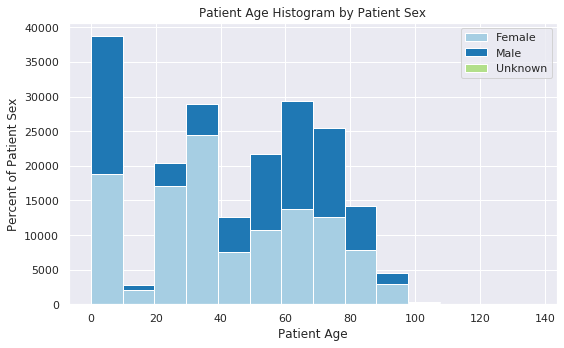

In [0]:
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True, figsize=(8,5))
x1 = list(collapsed1[collapsed1['Patient Sex'] == 'Female']['Patient Age'])
x2 = list(collapsed1[collapsed1['Patient Sex'] == 'Male']['Patient Age'])
x3 = list(collapsed1[collapsed1['Patient Sex'] == 'Unknown']['Patient Age'])

colors = sns.color_palette("Paired", 3)
names = ['Female', 'Male', 'Unknown']
# Stacked histogram 
plt.hist([x1, x2, x3], bins = 14, stacked=True,
         normed=False, color = colors, label=names)

plt.legend()
plt.xlabel('Patient Age')
plt.ylabel('Percent of Patient Sex')
plt.title('Patient Age Histogram by Patient Sex')

In [0]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,0.352504,0.167920,0.045181,0.467142
1,0.257919,0.652109,0.858952,0.793104
2,0.266741,0.094412,0.771476,0.542310
3,0.701658,0.838411,0.864367,0.912609
4,0.068849,0.640651,0.247947,0.125984
5,0.147905,0.177593,0.019551,0.455278
6,0.057215,0.253756,0.966820,0.763318
7,0.123453,0.534067,0.992546,0.538543
8,0.394640,0.504386,0.185023,0.203919
9,0.154359,0.735869,0.197080,0.073862


In [0]:
d1 = {'Female': x1, 'Male': x2, 'Unknown': x3}

In [0]:
d1

In [0]:
df1 = pd.DataFrame(data=d1)
df1

ValueError: ignored

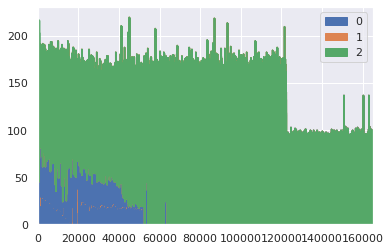

In [0]:

data.plot.area()


In [0]:
labels = 'Readmitted within 30 days', 'C++', 'Ruby', 'Java'
sizes = [215, 130, 245, 210]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

,Unnamed: 0,Unnamed: 0.1,APR-DRG Wt,MSDRG Wt,APR-DRG Code,APR-DRG Name,APR-DRG SOI,Adm Date,Admit Pract NPI,Admit Pract Name,Charges,Check-in Source,Check-in Type,Days to Readmission (Index = start of new patient),Discharge Date,Discharge Status Code,Discharge Status Name,Encounters,Entity Name,Facility of Origin,Fixed Dir Costs,Insured ID Number,Length of Stay,MDC Code,MDC Descr,MSDRG Code,MSDRG Name,Med Svc Code,Med Svc Name,Newborn Flag,NumOfRead,Pat Home Country Name,Pat Home State Code & Name,Pat Home Zip Code & Name,Patient Account Number,Patient Age,Patient Employer Name,Patient Full Name,Patient MEI Code,Patient Payment,...,Posted Denial_Downgrade Only,Posted Denials_Non Downgrade,Pract of Rec Full Name,Pract of Rec NPI,Primary Payor Detailed Act Pmt,Primary Payor Detailed Exp'd Pmt,Primary Payor Financial Class,Primary Payor Grouping,Primary Payor Plan ID,Primary Payor Plan Name,Prin Clin Proc Code,Prin Diagnosis Code,Prin Diagnosis Name,Princ Clin Proc Name,Read,Read30Days,Read7Days,Readmission Pts,Registr Point of OriginName,Sec Diagnosis Code,Sec Diagnosis Name,Secondary Payor Code,Secondary Payor Payment Act Pmt,Secondary Payor Plan Code,Secondary Procedure Code,Secondary Procedure Name,Service Line 1 Description,Service Line 2 Description,Service Line 3 Description,Third Diagnosis Code,Third Diagnosis Name,Total Account Balance,Total Cost,Total Fixed Cost,Total Payor Detailed Act Pmt,Total Variable Cost,Transportation,Variable Dir Labor,Variable Dir Supply,Zip
0,0,0,0.8400,0.7700,723.0,VIRAL ILLNESS,3.0,5/6/17,1.336440e+09,"MAZUREK, JEREMY ARYEH",66220.00,Non-Health care Facility Point of Origin,Emergency,0,5/10/17,1.0,"Home, self care",1,Hospital of the University of Pennsylvania,NaN,5333.91,1184663,4,18.0,INFECTIOUS + PARASITIC DISEASES SYSTEMIC OR UN...,866.0,VIRAL ILLNESS W/O MCC MS,CVM,CARDIOVASCULAR MEDICINE,NaN,4,UNITED STATES,PA PENNSYLVANIA,19143 PHILADELPHIA,10002985166,63.0,DISABLED,"BRAXTON,ROBERT E",1000000005,NaN,...,NaN,NaN,"FORDE-MCLEAN, RHONDALYN",1.568512e+09,9542.53,9369.67,Managed Medicaid,Managed Medicaid,125002,HEALTH PARTNERS MEDICAID,NaN,NaN,NaN,NaN,Y,N,N,1.0,EO-Emergency,N17.9,"Acute kidney failure, unspecified",NaN,NaN,NaN,NaN,NaN,General Medicine,General Medicine,Infectious Disease,Z94.1,Heart transplant status,-172.86,14677.94,10014.64,9542.53,4663.30,NaN,3052.31,1610.99,19143
1,1,1,0.8400,0.7700,723.0,VIRAL ILLNESS,3.0,8/23/17,1.093736e+09,"MATHER, PAUL J",48211.00,Clinic or Physician's Office,Emergency,105,8/26/17,6.0,Home health service,1,Hospital of the University of Pennsylvania,NaN,4786.63,1184663,3,18.0,INFECTIOUS + PARASITIC DISEASES SYSTEMIC OR UN...,866.0,VIRAL ILLNESS W/O MCC MS,CVM,CARDIOVASCULAR MEDICINE,NaN,4,UNITED STATES,PA PENNSYLVANIA,19143 PHILADELPHIA,10008189870,64.0,DISABLED,"BRAXTON,ROBERT E",1000000005,NaN,...,NaN,NaN,"MATHER, PAUL J",1.093736e+09,9548.53,9557.53,Managed Medicaid,Managed Medicaid,125002,HEALTH PARTNERS MEDICAID,02HV33Z,B25.9,"Cytomegaloviral disease, unspecified","Insertion of Infusion Dev into Sup Vena Cava, ...",Y,N,N,1.0,RB-Routine Admission Unscheduled,Z94.1,Heart transplant status,NaN,NaN,NaN,NaN,NaN,General Medicine,General Medicine,Infectious Disease,E11.22,Type 2 diabetes mellitus w diabetic chronic ki...,0.00,11699.29,7876.70,9548.53,3822.59,NaN,2643.51,1179.08,19143
2,2,2,0.8500,0.7500,206.0,"MALFUNCTION,REACTION,COMPLICATION OF CARDIAC/V...",3.0,11/28/18,1.316389e+09,"BIRATI, EDO YAAKOV",198539.00,Non-Health care Facility Point of Origin,Emergency,459,12/6/18,6.0,Home health service,1,Hospital of the University of Pennsylvania,NaN,8037.96,5292007,8,5.0,DISEASES + DISORDERS OF THE CIRCULATORY SYSTEM,316.0,OTHER CIRCULATORY SYSTEM DIAGNOSES W/O CC/MCC MS,CVM,CARDIOVASCULAR MEDICINE,NaN,4,UNITED STATES,PA PENNSYLVANIA,19143 PHILADELPHIA,10030893259,65.0,DISABLED,"BRAXTON,ROBERT E",1000000005,NaN,...,NaN,NaN,"MATHER, PAUL J",1.093736e+09,6692.30,6686.14,Managed Medicare,Managed Medicare,177001,HEALTH PARTNERS MEDICARE,0JH63XZ,T86.21,Heart

In [0]:
collapsed1.head()

,Unnamed: 0,Unnamed: 0.1,APR-DRG Wt,MSDRG Wt,APR-DRG Code,APR-DRG Name,APR-DRG SOI,Adm Date,Admit Pract NPI,Admit Pract Name,Charges,Check-in Source,Check-in Type,Days to Readmission (Index = start of new patient),Discharge Date,Discharge Status Code,Discharge Status Name,Encounters,Entity Name,Facility of Origin,Fixed Dir Costs,Insured ID Number,Length of Stay,MDC Code,MDC Descr,MSDRG Code,MSDRG Name,Med Svc Code,Med Svc Name,Newborn Flag,NumOfRead,Pat Home Country Name,Pat Home State Code & Name,Pat Home Zip Code & Name,Patient Account Number,Patient Age,Patient Employer Name,Patient Full Name,Patient MEI Code,Patient Payment,...,Posted Denial_Downgrade Only,Posted Denials_Non Downgrade,Pract of Rec Full Name,Pract of Rec NPI,Primary Payor Detailed Act Pmt,Primary Payor Detailed Exp'd Pmt,Primary Payor Financial Class,Primary Payor Grouping,Primary Payor Plan ID,Primary Payor Plan Name,Prin Clin Proc Code,Prin Diagnosis Code,Prin Diagnosis Name,Princ Clin Proc Name,Read,Read30Days,Read7Days,Readmission Pts,Registr Point of OriginName,Sec Diagnosis Code,Sec Diagnosis Name,Secondary Payor Code,Secondary Payor Payment Act Pmt,Secondary Payor Plan Code,Secondary Procedure Code,Secondary Procedure Name,Service Line 1 Description,Service Line 2 Description,Service Line 3 Description,Third Diagnosis Code,Third Diagnosis Name,Total Account Balance,Total Cost,Total Fixed Cost,Total Payor Detailed Act Pmt,Total Variable Cost,Transportation,Variable Dir Labor,Variable Dir Supply,Zip
0,0,0,0.8400,0.7700,723.0,VIRAL ILLNESS,3.0,5/6/17,1.336440e+09,"MAZUREK, JEREMY ARYEH",66220.00,Non-Health care Facility Point of Origin,Emergency,0,5/10/17,1.0,"Home, self care",1,Hospital of the University of Pennsylvania,NaN,5333.91,1184663,4,18.0,INFECTIOUS + PARASITIC DISEASES SYSTEMIC OR UN...,866.0,VIRAL ILLNESS W/O MCC MS,CVM,CARDIOVASCULAR MEDICINE,NaN,4,UNITED STATES,PA PENNSYLVANIA,19143 PHILADELPHIA,10002985166,63.0,DISABLED,"BRAXTON,ROBERT E",1000000005,NaN,...,NaN,NaN,"FORDE-MCLEAN, RHONDALYN",1.568512e+09,9542.53,9369.67,Managed Medicaid,Managed Medicaid,125002,HEALTH PARTNERS MEDICAID,NaN,NaN,NaN,NaN,Y,N,N,1.0,EO-Emergency,N17.9,"Acute kidney failure, unspecified",NaN,NaN,NaN,NaN,NaN,General Medicine,General Medicine,Infectious Disease,Z94.1,Heart transplant status,-172.86,14677.94,10014.64,9542.53,4663.30,NaN,3052.31,1610.99,19143
5,5,5,0.3700,0.8200,775.0,ALCOHOL ABUSE & DEPENDENCE,2.0,9/30/18,1.346582e+09,"BHALLA, RAMANDEEP",43823.06,Non-Health care Facility Point of Origin,Emergency,0,10/2/18,1.0,"Home, self care",1,Princeton Health,NaN,730.30,3QC8H97YP31,2,NaN,NaN,897.0,ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REHABILIT...,HSP,HOSPITALIST,NaN,1,UNITED STATES,NJ NEW JERSEY,08648 LAWRENCEVILLE,23000952285,72.0,ITEM NOT FOUND,"AKLONIS,CAROL",8000143866,NaN,...,NaN,NaN,"FANNING, CHRISTINE M",1.881016e+09,5140.33,6586.48,Medicare,Medicare,137003,MEDICARE PART A & B,4A10X4Z,NaN,NaN,"Monitoring of CNS Electr Activity, Extern Appr...",Y,N,N,2.0,EO-Emergency,A69.22,Other neurologic disorders in Lyme disease,UHC EXISTING EMPLOYER GROUP,"$1,340.00",154003.0,NaN,NaN,Behavioral Health,Behavioral Health,Substance Abuse,I10,Essential (primary) hypertension,0.00,6075.24,3889.71,6480.33,2185.53,NaN,1891.04,294.49,08648
7,7,7,1.6300,2.0500,302.0,KNEE JOINT REPLACEMENT,2.0,9/4/18,1.205855e+09,"GUTOWSKI, WALTER THOMAS",51053.42,Clinic or Physician's Office,Elective,0,9/6/18,6.0,Home health service,1,Princeton Health,NaN,972.53,8WU7UM3VA34,2,8.0,DISEASES + DISORDERS OF THE MUSCULOSKELETAL SY...,470.0,MAJOR HIP AND KNEE JOINT REPLACEMENT OR REATTA...,ORT,ORTHOPEDICS,NaN,1,UNITED STATES,NJ NEW JERSEY,08553 ROCKY HILL,23000401432,73.0,RETIRED,"CONOVER,ROBERTA D",8000356208,NaN,...,NaN,NaN,"GUTOWSKI, WALTER THOMAS",1.205855e+09,14538.40,16127.13,Medicare,Medicare,137003,MEDICARE PART A & B,0SRD0J9,M17.12,"Unilateral primary osteoarthritis, left knee","Replace of L Knee Jt with Synth Sub, Cement, O...",Y,N,N,3.0,RA-Routine Admission Sched/Booked,Z68.42,"Body mass i

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 1.0, 'Patient Age by Readmission')

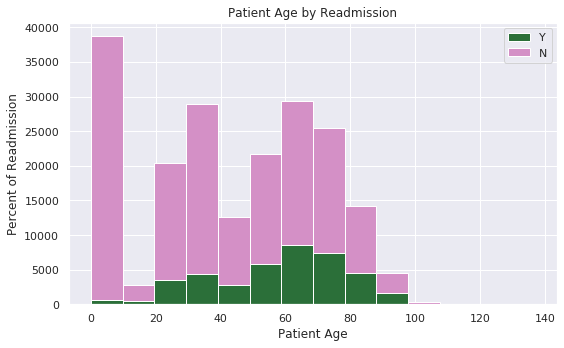

In [0]:
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True, figsize=(8,5))
x1 = list(collapsed1[collapsed1['Read'] == 'Y']['Patient Age'])
x2 = list(collapsed1[collapsed1['Read'] == 'N']['Patient Age'])


colors = sns.color_palette("cubehelix", 2)
names = ['Y', 'N']
# Stacked histogram with multiple airlines
plt.hist([x1, x2], bins = 14, stacked=True,
         normed=False, color = colors, label=names)

plt.legend()
plt.xlabel('Patient Age')
plt.ylabel('Percent of Readmission')
plt.title('Patient Age by Readmission')

In [0]:
collapsed4 = collapsed[collapsed["Read7Days"] == 'Y'].drop_duplicates("Patient Full Name")
collapsed5 = collapsed[collapsed["Read7Days"] == 'N'].drop_duplicates("Patient Full Name")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 1.0, 'Patient Age by Readmission Within 30 Days')

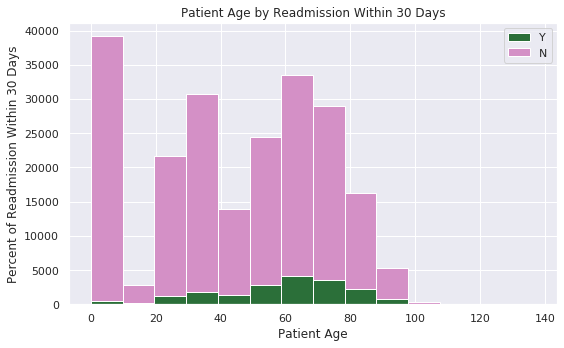

In [0]:
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True, figsize=(8,5))
x1 = list(collapsed2['Patient Age'])
x2 = list(collapsed3['Patient Age'])


colors = sns.color_palette("cubehelix", 2)
names = ['Y', 'N']
# Stacked histogram with multiple airlines
plt.hist([x1, x2], bins = 14, stacked=True,
         normed=False, color = colors, label=names)

plt.legend()
plt.xlabel('Patient Age')
plt.ylabel('Percent of Readmission Within 30 Days')
plt.title('Patient Age by Readmission Within 30 Days')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 1.0, 'Patient Age by Readmission Within 7 Days')

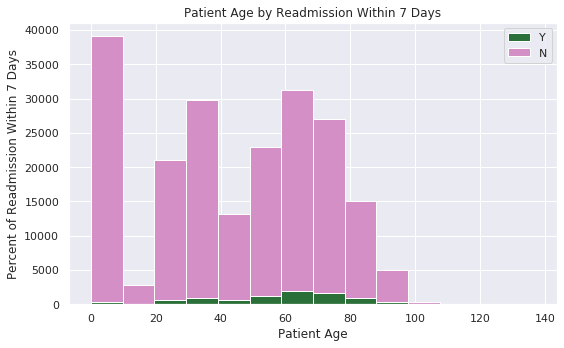

In [0]:
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True, figsize=(8,5))
x1 = list(collapsed4['Patient Age'])
x2 = list(collapsed5['Patient Age'])


colors = sns.color_palette("cubehelix", 2)
names = ['Y', 'N']
# Stacked histogram with multiple airlines
plt.hist([x1, x2], bins = 14, stacked=True,
         normed=False, color = colors, label=names)

plt.legend()
plt.xlabel('Patient Age')
plt.ylabel('Percent of Readmission Within 7 Days')
plt.title('Patient Age by Readmission Within 7 Days')

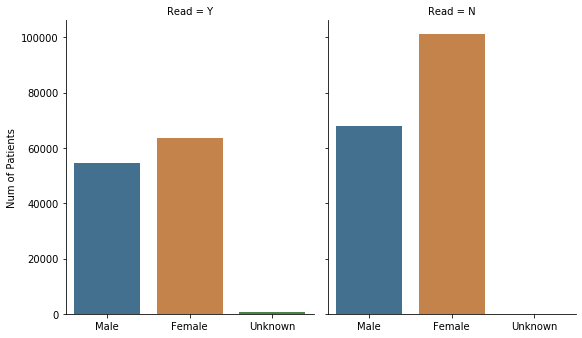

In [0]:
#fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')
fig.set_size_inches(10, 8)
g = sns.catplot("Patient Sex", col="Read",col_wrap=2,
                 data=collapsed, saturation=.5,
                 kind="count",  height=5, aspect=.8)
g.set_axis_labels("", "Num of Patients")

**Patient Sex vs. Readmitted <= 30 days**

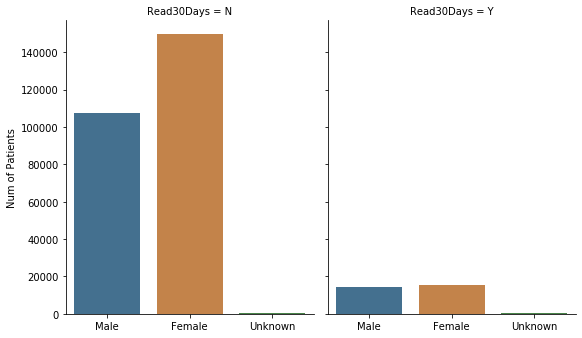

In [0]:
fig.set_size_inches(13, 8)
g = sns.catplot("Patient Sex", col="Read30Days",col_wrap=2,
                 data=collapsed, saturation=.5, 
                 kind="count",  height=5, aspect=.8)
g.set_axis_labels("", "Num of Patients")

**Patient Sex vs. Readmitted <= 7 days**

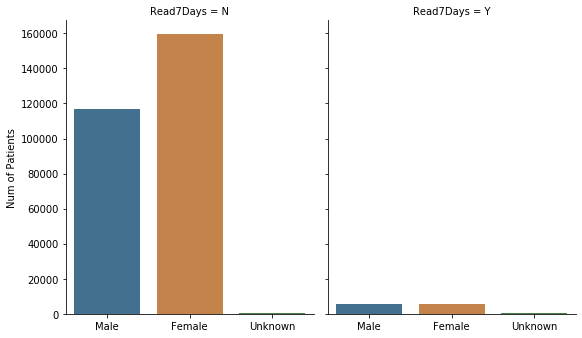

In [0]:
fig.set_size_inches(13, 8)
g = sns.catplot("Patient Sex", col="Read7Days",col_wrap=2,
                 data=collapsed, saturation=.5, 
                 kind="count",  height=5, aspect=.8)
g.set_axis_labels("", "Num of Patients")

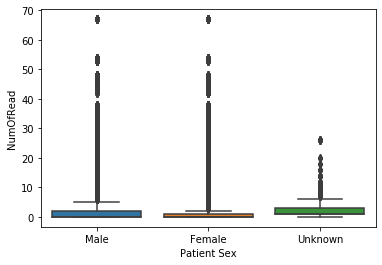

In [0]:
sns.boxplot(x="Patient Sex", y="NumOfRead", data=collapsed)

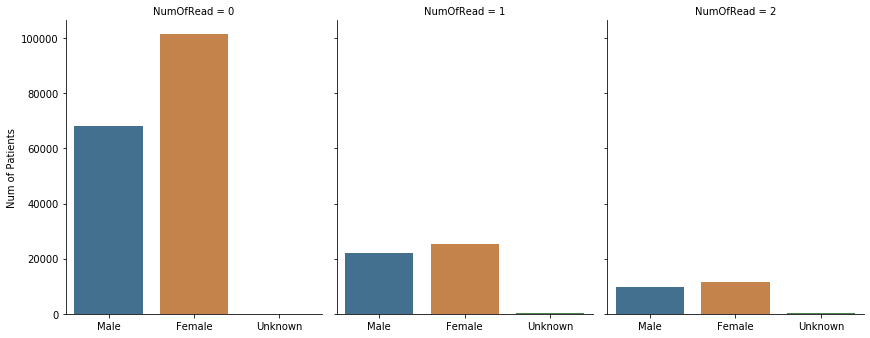

In [0]:
#g = sns.FacetGrid(collapsed, height=5, col="NumOfRead", col_order = [0,1,2,3] , margin_titles=True)
fig.set_size_inches(13, 8)
g = sns.catplot("Patient Sex", col="NumOfRead",col_order = [0,1,2],col_wrap=3,
                 data=collapsed, saturation=.5, 
                 kind="count",  height=5, aspect=.8)
g.set_axis_labels("", "Num of Patients")

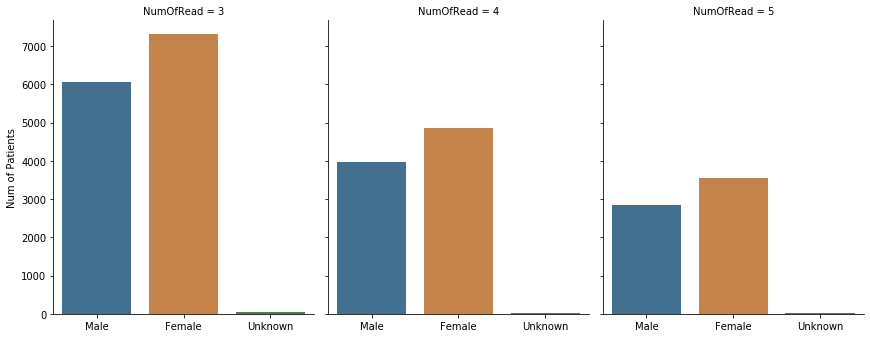

In [0]:
#g = sns.FacetGrid(collapsed, height=5, col="NumOfRead", col_order = [0,1,2,3] , margin_titles=True)
fig.set_size_inches(13, 8)
g = sns.catplot("Patient Sex", col="NumOfRead",col_order = [3,4,5],col_wrap=3,
                 data=collapsed, saturation=.5, 
                 kind="count",  height=5, aspect=.8)
g.set_axis_labels("", "Num of Patients")

###Patient Age

In [0]:
collapsed['Patient Age'].max()

139.0

**Patient Age vs. Readmitted or not**

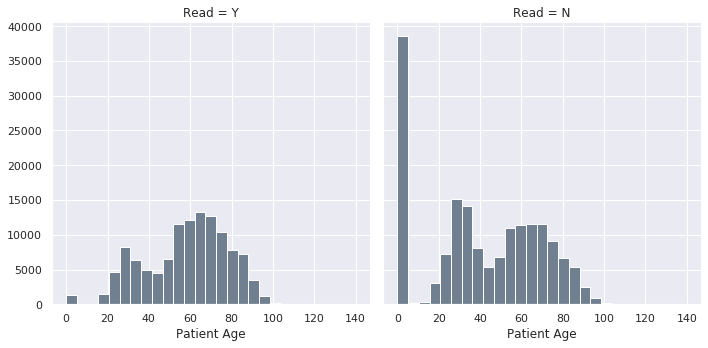

In [0]:
g = sns.FacetGrid(collapsed, height=5, col="Read", margin_titles=True)
bins = np.linspace(0, 140, 28)
g.map(plt.hist, "Patient Age", color="slategray",bins=bins)
plt.savefig('combine4.png',dpi = 200)

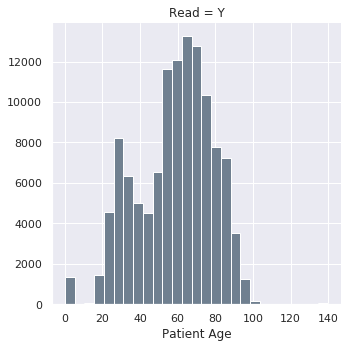

In [0]:
g = sns.FacetGrid(collapsed, height=5, col="Read",col_order=["Y"], margin_titles=True)
g.map(plt.hist, "Patient Age", color="slategray",bins=bins)


**Patient Age vs. Readmitted <= 30 days**

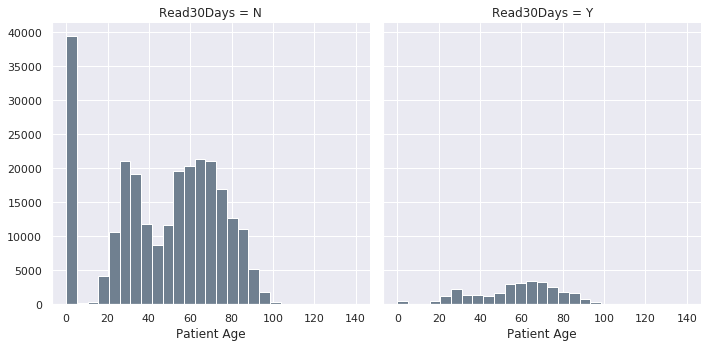

In [0]:
g = sns.FacetGrid(collapsed, height=5, col="Read30Days", margin_titles=True)
g.map(plt.hist, "Patient Age", color="slategray",bins=bins)

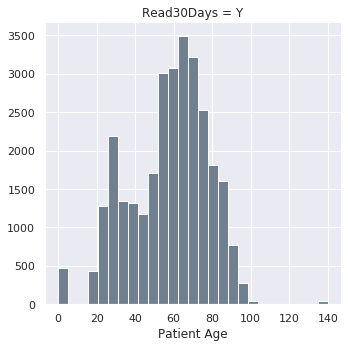

In [0]:
g = sns.FacetGrid(collapsed, height=5, col="Read30Days",col_order=["Y"], margin_titles=True)
g.map(plt.hist, "Patient Age", color="slategray",bins=bins)

**Patient Age vs. Readmitted <= 7 days**

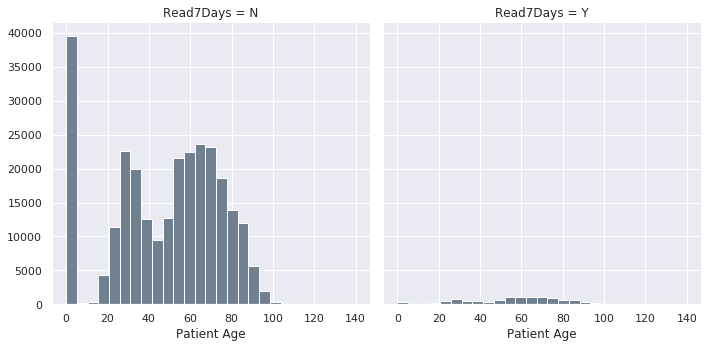

In [0]:
g = sns.FacetGrid(collapsed, height=5, col="Read7Days", margin_titles=True)
g.map(plt.hist, "Patient Age", color="slategray",bins=bins)

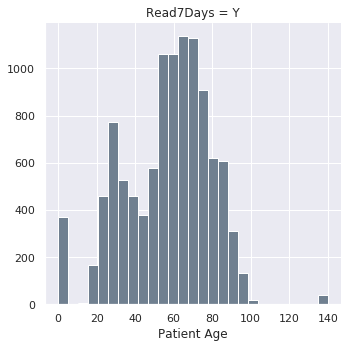

In [0]:
g = sns.FacetGrid(collapsed, height=5, col="Read7Days",col_order=["Y"], margin_titles=True)
g.map(plt.hist, "Patient Age", color="slategray",bins=bins)

 Patients between 50-80 have more readmissions.

###Patient Sex & Age

**Patient Sex/Age vs. Readmitted or not**

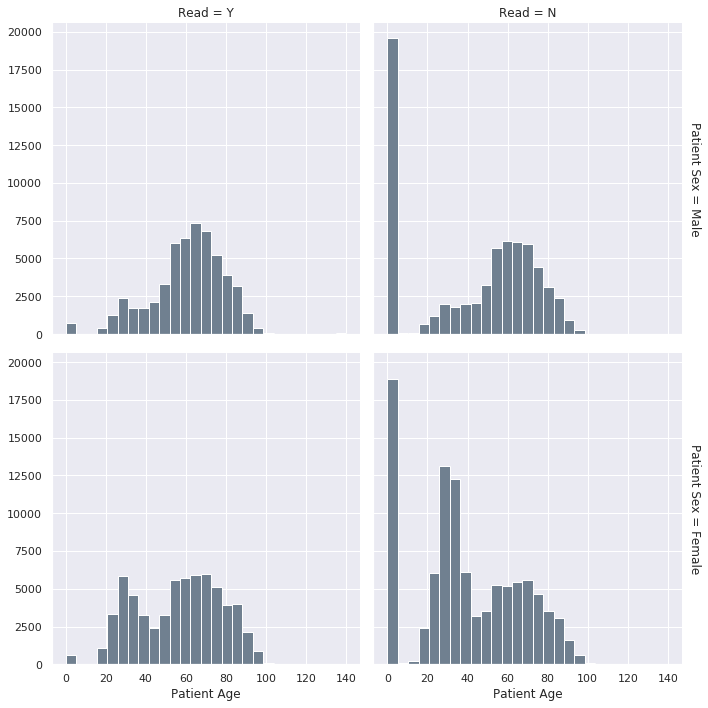

In [0]:
sns.set(style="darkgrid")
g = sns.FacetGrid(collapsed, row="Patient Sex", height=5, row_order = ["Male","Female"], col="Read", margin_titles=True)
bins = np.linspace(0, 140, 28)
g.map(plt.hist, "Patient Age", color="slategray",bins=bins)
plt.savefig('combine.png',dpi = 200)

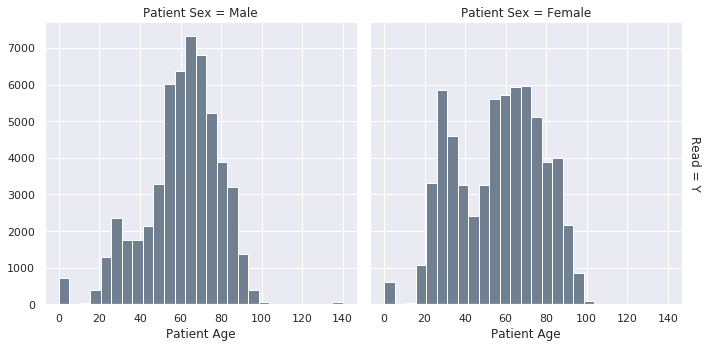

In [0]:
sns.set(style="darkgrid")
g = sns.FacetGrid(collapsed, row="Read", height=5, col_order = ["Male","Female"],row_order = ["Y"], col="Patient Sex", margin_titles=True)
bins = np.linspace(0, 140, 28)
g.map(plt.hist, "Patient Age", color="slategray",bins=bins)
plt.savefig('combine1.png',dpi = 200)

**Patient Sex/Age vs. Readmitted <= 30 days**

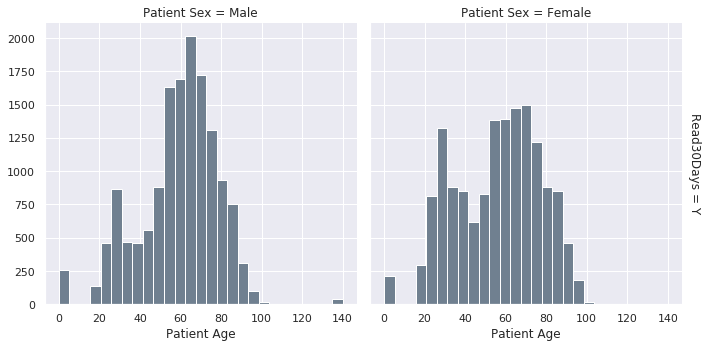

In [0]:
sns.set(style="darkgrid")
g = sns.FacetGrid(collapsed, row="Read30Days", height=5, col_order = ["Male","Female"],row_order = ["Y"], col="Patient Sex", margin_titles=True)
bins = np.linspace(0, 140, 28)
g.map(plt.hist, "Patient Age", color="slategray",bins=bins)
plt.savefig('combine2.png',dpi = 200)

**Patient Sex/Age vs. Readmitted <= 7 days**

In [0]:
sns.set(style="darkgrid")
g = sns.FacetGrid(collapsed, row="Read7Days", height=5, col_order = ["Male","Female"],row_order = ["Y"], col="Patient Sex", margin_titles=True)
bins = np.linspace(0, 140, 28)
g.map(plt.hist, "Patient Age", color="slategray",bins=bins)
plt.savefig('combine3.png',dpi = 200)

NameError: ignored

More males readmitted than female.

In [0]:
collapsed.to_csv("/content/drive/My Drive/combine.csv")

###PayorGrouping


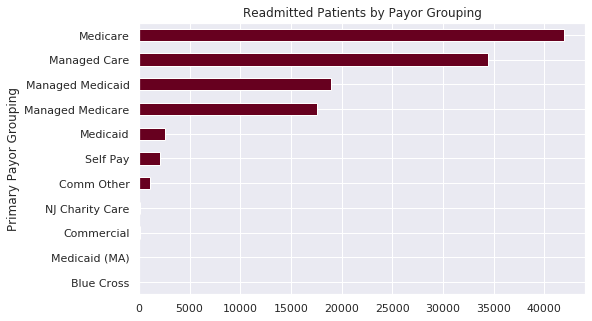

In [0]:
collapsed[collapsed['Read'] == "Y"].groupby('Primary Payor Grouping').count()['Patient Sex']\
    .sort_values() \
    .plot(figsize=(8, 5), kind='barh',colormap='RdBu', title='Readmitted Patients by Payor Grouping')
plt.show()

In [0]:
read = collapsed[collapsed['Read'] == "Y"]

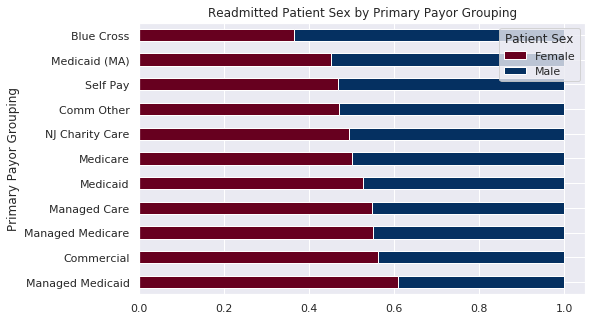

In [0]:
read[read['Patient Sex'] != "Unknown"].groupby(['Primary Payor Grouping','Patient Sex']) \
    .count() \
    .unstack('Patient Sex')['Unnamed: 0'] \
    .T.apply(lambda x: x / x.sum()) \
    .sort_values('Patient Sex').T.sort_values('Female', ascending=False) \
    .plot(kind='barh',colormap='RdBu',
          figsize=(8, 5),
          title='Readmitted Patient Sex by Primary Payor Grouping',
          stacked=True)
plt.show()

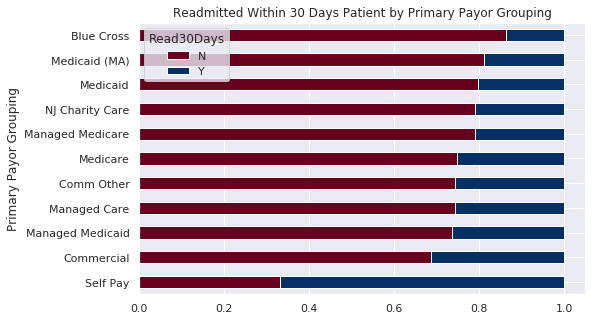

In [0]:
read.groupby(['Primary Payor Grouping','Read30Days']) \
    .count() \
    .unstack('Read30Days')['Patient Sex'] \
    .T.apply(lambda x: x / x.sum()) \
    .sort_values('Read30Days').T.sort_values('Y', ascending=False) \
    .plot(kind='barh',colormap='RdBu',
          figsize=(8, 5),
          title='Readmitted Within 30 Days Patient by Primary Payor Grouping',
          stacked=True)
plt.show()

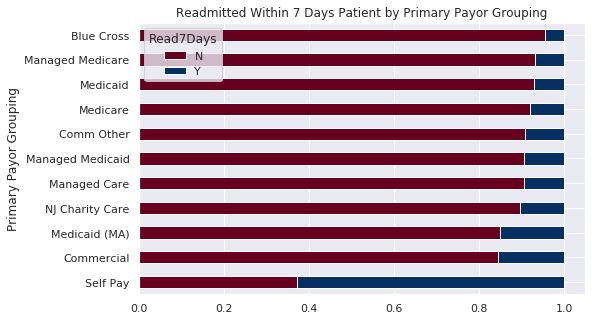

In [0]:
read.groupby(['Primary Payor Grouping','Read7Days']) \
    .count() \
    .unstack('Read7Days')['Patient Sex'] \
    .T.apply(lambda x: x / x.sum()) \
    .sort_values('Read7Days').T.sort_values('Y', ascending=False) \
    .plot(kind='barh',colormap='RdBu',
          figsize=(8, 5),
          title='Readmitted Within 7 Days Patient by Primary Payor Grouping',
          stacked=True)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


Text(0.5, 1.0, 'Side-by-Side Histogram with Multiple Payors')

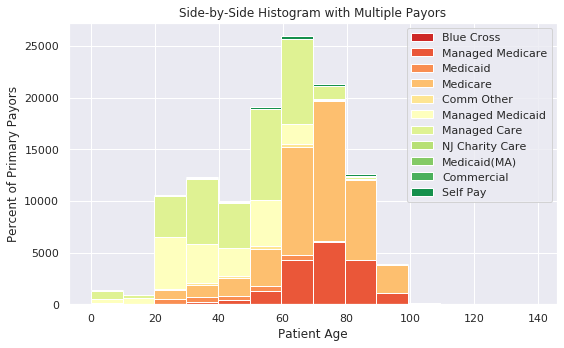

In [0]:
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True, figsize=(8,5))
x1 = list(collapsed[collapsed['Primary Payor Grouping'] == 'Blue Cross']['Patient Age'])
x2 = list(collapsed[collapsed['Primary Payor Grouping'] == 'Managed Medicare']['Patient Age'])
x3 = list(collapsed[collapsed['Primary Payor Grouping'] == 'Medicaid']['Patient Age'])
x4 = list(collapsed[collapsed['Primary Payor Grouping'] == 'Medicare']['Patient Age'])
x5 = list(collapsed[collapsed['Primary Payor Grouping'] == 'Comm Other']['Patient Age'])
x6 = list(collapsed[collapsed['Primary Payor Grouping'] == 'Managed Medicaid']['Patient Age'])
x7 = list(collapsed[collapsed['Primary Payor Grouping'] == 'Managed Care']['Patient Age'])
x8 = list(collapsed[collapsed['Primary Payor Grouping'] == 'NJ Charity Care']['Patient Age'])
x9 = list(collapsed[collapsed['Primary Payor Grouping'] == 'Medicaid(MA)']['Patient Age'])
x10 = list(collapsed[collapsed['Primary Payor Grouping'] == 'Commercial']['Patient Age'])
x11 = list(collapsed[collapsed['Primary Payor Grouping'] == 'Self Pay']['Patient Age'])
colors = sns.color_palette("RdYlGn",11)
names = ['Blue Cross', 'Managed Medicare', 'Medicaid','Medicare','Comm Other','Managed Medicaid',
         'Managed Care', 'NJ Charity Care','Medicaid(MA)','Commercial','Self Pay']
# Stacked histogram with multiple airlines
plt.hist([x1, x2, x3, x4, x5,x6,x7,x8,x9,x10,x11], bins = 14, stacked=True,
         normed=False, color = colors, label=names)

plt.legend()
plt.xlabel('Patient Age')
plt.ylabel('Percent of Primary Payors')
plt.title('Side-by-Side Histogram with Multiple Payors')

###Zip

In [0]:
collapsed['Zip'] = collapsed['Pat Home Zip Code & Name'].str.replace('([A-Za-z]+)', '')

In [0]:
collapsed.to_csv("/content/drive/My Drive/added_zip.csv")

In [0]:
JoinCensus = pd.read_csv('/content/drive/My Drive/JoinCensus.csv')

In [0]:
JoinCensus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286646 entries, 0 to 286645
Data columns (total 96 columns):
ZipCode                                               286646 non-null int64
APR-DRG Wt                                            286365 non-null float64
MSDRG Wt                                              285744 non-null object
APR-DRG Code                                          286365 non-null float64
APR-DRG Name                                          286365 non-null object
APR-DRG SOI                                           286365 non-null float64
Adm Date                                              286646 non-null object
Admit Pract NPI                                       284958 non-null float64
Admit Pract Name                                      285293 non-null object
Charges                                               286646 non-null float64
Check-in Source                                       285905 non-null object
Check-in Type                         

In [0]:
JoinCensus_drop = JoinCensus.drop_duplicates("Patient Full Name")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


Text(0.5, 1.0, 'Census Tract Median Income Histogram by Readmission')

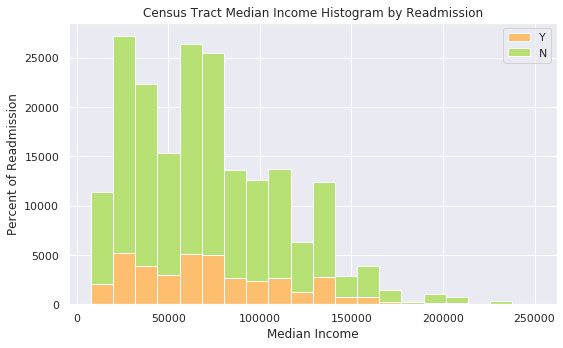

In [0]:
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True, figsize=(8,5))
x1 = list(JoinCensus_drop[JoinCensus_drop['Read'] == 'Y']['Med_Inc'])
x2 = list(JoinCensus_drop[JoinCensus_drop['Read'] == 'N']['Med_Inc'])
colors = sns.color_palette("RdYlGn",2)
names = ['Y', 'N']
# Stacked histogram with multiple airlines
plt.hist([x1, x2], bins = 20, stacked=True,
         normed=False, color = colors, label=names)

plt.legend()
plt.xlabel('Median Income')
plt.ylabel('Percent of Readmission')
plt.title('Census Tract Median Income Histogram by Readmission')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


Text(0.5, 1.0, 'Census Tract Median Income Histogram by Readmission')

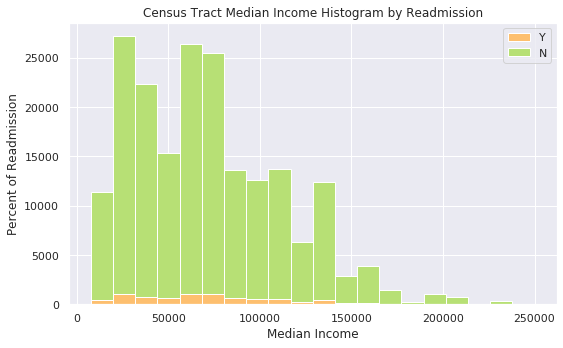

In [0]:
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True, figsize=(8,5))
x1 = list(JoinCensus_drop[JoinCensus_drop['Read30Days'] == 'Y']['Med_Inc'])
x2 = list(JoinCensus_drop[JoinCensus_drop['Read30Days'] == 'N']['Med_Inc'])
colors = sns.color_palette("RdYlGn",2)
names = ['Y', 'N']
# Stacked histogram with multiple airlines
plt.hist([x1, x2], bins = 20, stacked=True,
         normed=False, color = colors, label=names)

plt.legend()
plt.xlabel('Median Income')
plt.ylabel('Percent of Readmission')
plt.title('Census Tract Median Income Histogram by Readmission Within')

In [0]:
JoinPA = JoinCensus[JoinCensus['Pat State Ab'] == "PA"]

In [0]:
JoinPA.reset_index(drop=True, inplace=True)

In [0]:
JoinPA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219067 entries, 0 to 219066
Data columns (total 96 columns):
ZipCode                                               219067 non-null int64
APR-DRG Wt                                            218859 non-null float64
MSDRG Wt                                              218384 non-null object
APR-DRG Code                                          218859 non-null float64
APR-DRG Name                                          218859 non-null object
APR-DRG SOI                                           218859 non-null float64
Adm Date                                              219067 non-null object
Admit Pract NPI                                       217713 non-null float64
Admit Pract Name                                      218022 non-null object
Charges                                               219067 non-null float64
Check-in Source                                       218512 non-null object
Check-in Type                         

In [0]:
JoinPA['PovertyLevel'] = JoinPA.apply(lambda _: '', axis=1)

for i in range(0,219067):
  if(JoinPA.iloc[i]['Med_Inc']<50000):
    JoinPA.iloc[i]['PovertyLevel']="Poor"
  elif(JoinPA.iloc[i]['Med_Inc']<100000):
    JoinPA.iloc[i]['PovertyLevel']="Good"
  elif(JoinPA.iloc[i]['Med_Inc']<180000):
    JoinPA.iloc[i]['PovertyLevel']="Upper"
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imp

In [0]:
JoinPA.to_csv('/content/drive/My Drive/JoinPA.csv')

In [0]:
JoinPA['PovertyLevel']

0          
1          
2          
3          
4          
         ..
219062     
219063     
219064     
219065     
219066     
Name: PovertyLevel, Length: 219067, dtype: object